In [25]:
import pandas as pd 
import re
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
pd.options.display.max_columns= 200
plt.style.use('ggplot')

In [67]:
df= pd.read_csv('../Data/Batch 4/Batch4.csv')

In [68]:
df.head(2)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,92621,2020-07-23 12:12:10,4457732997086323466,fraud_Renner Ltd,home,82.59,Stanley,Mayo,M,3433 Jones Branch,Fiddletown,CA,95629,38.5234,-120.6763,832,Immigration officer,1987-05-19,6830ca24c98cc9113c39c39f053a4a37,1374581530,37.563202,-120.415045,0
1,92622,2020-07-23 12:12:44,341542810616333,fraud_Bauch-Blanda,entertainment,147.30,Billy,Mcdonald,M,304 Ryan Port Suite 335,Camden,MO,64017,39.2048,-94.0259,464,Colour technologist,1959-05-28,f83b5029a53f155d58ac4470c827d411,1374581564,38.268736,-93.945110,0


In [69]:
df.shape

(463098, 23)

In [70]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [71]:
df=df.drop(axis=1,columns=['Unnamed: 0','cc_num','trans_num',])
df.shape

(463098, 20)

In [72]:
df.head(2)

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-07-23 12:12:10,fraud_Renner Ltd,home,82.59,Stanley,Mayo,M,3433 Jones Branch,Fiddletown,CA,95629,38.5234,-120.6763,832,Immigration officer,1987-05-19,1374581530,37.563202,-120.415045,0
1,2020-07-23 12:12:44,fraud_Bauch-Blanda,entertainment,147.30,Billy,Mcdonald,M,304 Ryan Port Suite 335,Camden,MO,64017,39.2048,-94.0259,464,Colour technologist,1959-05-28,1374581564,38.268736,-93.945110,0


In [73]:
df.dtypes

trans_date_trans_time     object
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [74]:
for colname in list(df.columns) :
    #pd.to_datetime( df.eval('trans_date_trans_time'), format='%d/%m/%Y', errors='coerce')
    srch=re.search(r"^[1-2][0-9][0-9][0-9]-[0-1][0-9]-",str(df.at[0,colname]))
    if srch is not None :
        df[colname] = pd.to_datetime(df[colname])
    else:
        try:
            pd.to_numeric(df[colname], downcast="float")
        except ValueError:
            df[colname] = df[colname].astype("category")
            

In [75]:
df.dtypes

trans_date_trans_time    datetime64[ns]
merchant                       category
category                       category
amt                             float64
first                          category
last                           category
gender                         category
street                         category
city                           category
state                          category
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                            category
dob                      datetime64[ns]
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [76]:
df.isna().sum().sum()

0

In [77]:
df.loc[df.duplicated()]

,trans_date_trans_time,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud


## Step 3: Feature Understanding
(Univariate analysis)

- Plotting Feature Distributions 
    - Histogram
    - KDE
    - Boxplot

In [78]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'first', 'last',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

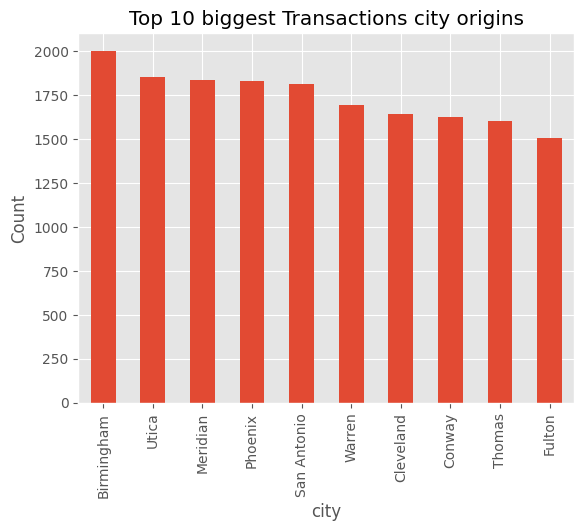

In [79]:
ax = df['city'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 biggest Transactions city origins')
ax.set_xlabel('city')
ax.set_ylabel('Count')
plt.savefig("../Plots and Images/Batch4City.svg")

In [80]:
dfJob=pd.DataFrame(df['job'].value_counts())
dfJob

,job
Film/video editor,3472
Exhibition designer,3346
"Surveyor, land/geomatics",3157
Naval architect,3144
"Designer, ceramics/pottery",2917
...,...
"Administrator, arts",165
"Geneticist, molecular",161
"Merchandiser, retail",154
Operational investment banker,11


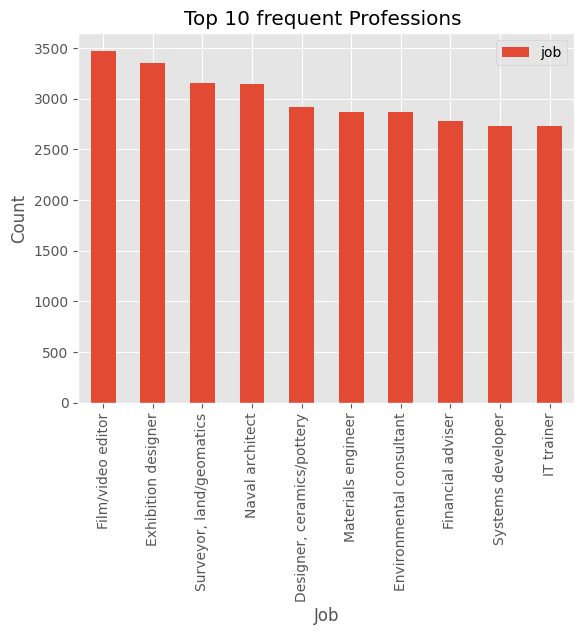

In [81]:
ax = dfJob.head(10).plot(kind='bar', title='Top 10 frequent Professions ')
ax.set_xlabel('Job')
ax.set_ylabel('Count')
plt.savefig("../Plots and Images/Batch4Jobs.svg")

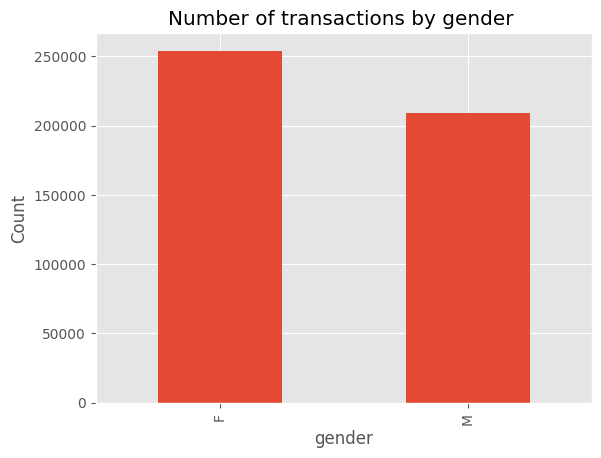

In [82]:
ax = df['gender'].value_counts() \
    .plot(kind='bar', title='Number of transactions by gender ')
ax.set_xlabel('gender')
ax.set_ylabel('Count')
plt.savefig("../Plots and Images/Batch4Gender.svg")

In [83]:
len(np.unique(df['is_fraud']))

2

{'Fraud': 0.38004914726472583, 'Legal': 99.61995085273527}


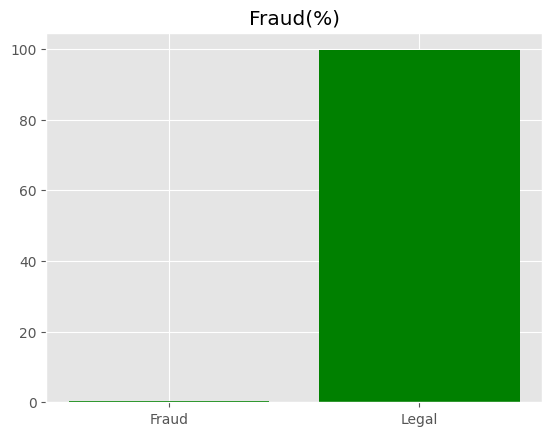

<Figure size 640x480 with 0 Axes>

In [84]:
rslt_df = df.loc[ df['is_fraud']== 1]
d=dict()
d["Fraud"]=100*len(rslt_df)/len(df)
d["Legal"]=100-100*len(rslt_df)/len(df)
print(d)
plt.bar(d.keys(), d.values(), color='g')
plt.title("Fraud(%)")
plt.show()
plt.savefig("../Plots and Images/Batch4Fraud%.svg")

In [85]:
summary=df.describe()
summary

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,463098.000000,463098.000000,463098.000000,463098.000000,4.630980e+05,4.630980e+05,463098.000000,463098.000000,463098.000000
mean,69.392401,48851.673343,38.542495,-90.238083,8.802435e+04,1.382179e+09,38.542291,-90.238094,0.003800
std,156.999514,26856.378049,5.061578,13.727205,3.000589e+05,4.340254e+06,5.095765,13.737948,0.061531
min,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.374582e+09,19.027422,-166.671575,0.000000
25%,9.630000,26250.750000,34.668900,-96.809400,7.410000e+02,1.378078e+09,34.753619,-96.910884,0.000000
50%,47.330000,48174.000000,39.371600,-87.476900,2.408000e+03,1.382508e+09,39.376431,-87.450318,0.000000
75%,83.030000,72011.000000,41.894800,-80.175200,1.968500e+04,1.386354e+09,41.952463,-80.267863,0.000000
max,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [86]:
df.to_csv('../Data/Batch 4/CleanTrain.csv',index=False)
summary.to_csv('../Data/Batch 4/CleanTrainSummary.csv',index=True)